Bayan Nezamabad 20251971
Jacob Beck 21304149

Code executes to the end without errors

### References:
[The dataset](https://www.kaggle.com/datasets/shahidulugvcse/national-flowers) <br>
[Understanding GoogLeNet Model - CNN Architecture](https://www.geeksforgeeks.org/understanding-googlenet-model-cnn-architecture/) <br>
[Going Deeper with Convolutions](https://arxiv.org/pdf/1409.4842) <br>
[TensorFlow Tutorials](https://www.tensorflow.org/tutorials) <br>
[Matplotlib Docs](https://matplotlib.org/stable/)

In [21]:
# Imports
import kagglehub
import os
from keras import utils
import matplotlib.pyplot as plt

In [22]:
# Downloading dataset from Kaggle
path = kagglehub.dataset_download("shahidulugvcse/national-flowers")

print("Path to dataset files:", path)

100%|██████████| 200M/200M [00:02<00:00, 79.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shahidulugvcse/national-flowers/versions/1


## The data set
Our dataset consists of images of 9 different types of national flowers which we will be classifying.
The total dataset consists of 4481 files, split roughly 80% training and 20% testing. <br>
Upon loading the dataset, some preprocessing is performed to make all images 224x224 since that is the requisite input size for GoogLeNet.

In [25]:
# Loading the data set
train_dir = path + '/flowerdataset/train'
test_dir = path + '/flowerdataset/test'

# GoogLeNet configurations
input_shape = (224, 224)
batch_size = 128

verbose = True
NB_CLASSES = 9
class_names = os.listdir(train_dir)
#class_names = ["Daisy", "Dandelion", "Lavender", "Lily", "Lotus", "Orchid", "Rose", "Sunflower", "Tulip"]

# Loading our training dataset
train_ds = utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=input_shape, # Images are resized to the correct dimensions
    shuffle=False,
    verbose=verbose)

# Loading our testing dataset
test_ds = utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=input_shape, # Images are resized to the correct dimensions
    shuffle=False,
    verbose=verbose)

Found 3600 files belonging to 9 classes.
Found 881 files belonging to 9 classes.


### Data preprocessing
For data preprocessing the first step is normalisation. We will use min-max normalisation to make all pixel values from the range 0 - 255 to 0 - 1.

In [26]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

### Data visualisation

Here we will visualise some of the data.<br>
First we will display a sample image of each class from the training dataset.
The images contain varying backgrounds and were originally of varying dimensions but we have scaled them all down to 224x224 for use with our models.<br><br>
Next we will display the class distribution for the training dataset and the testing dataset. As can be seen, the training dataset is entirely evenly distributed, and the testing dataset is also evenly distributed for the most part.<br>The only minor difference is that there are 92 test images for the Daisy class and 89 for the Orchid class. Every other class has 100 test images each.



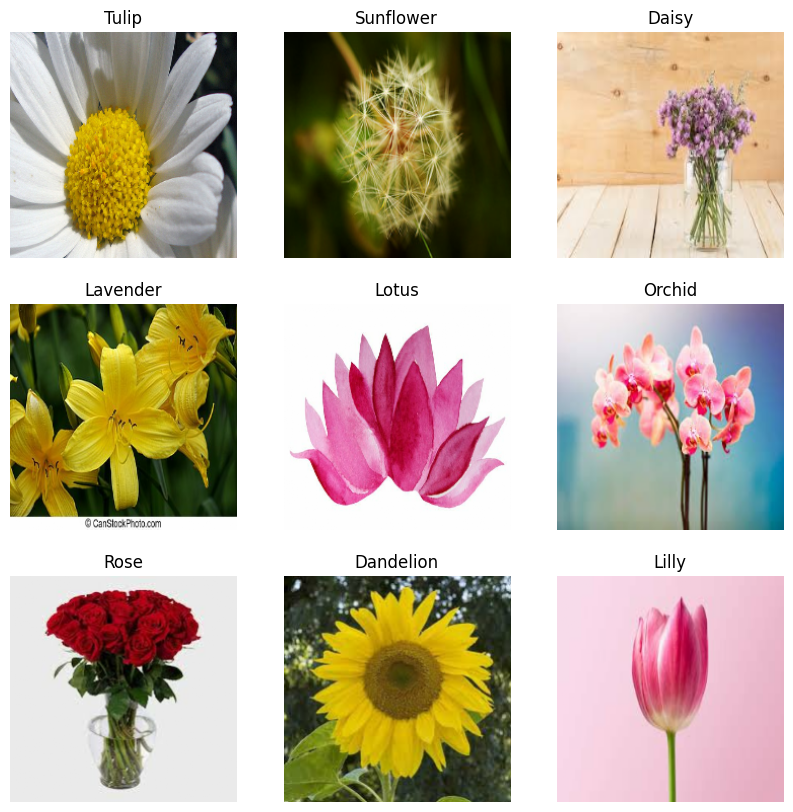

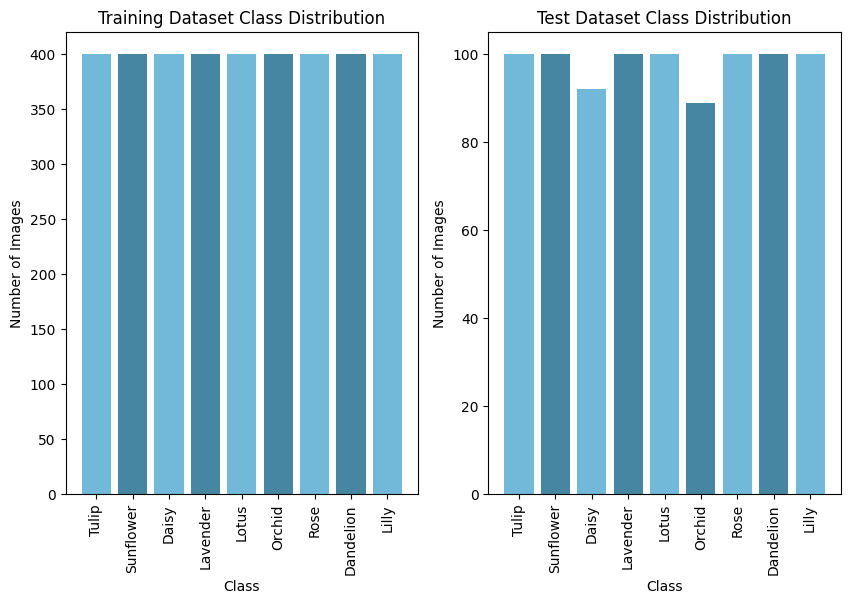

In [27]:
# Data visualisation

# Displaying sample images from the training dataset
images = []
for img_batch, label_batch in train_ds:
    images.extend(img_batch.numpy())

plt.figure(figsize=(10, 10))
for i in range(NB_CLASSES):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(images[i * 400])
    ax.set_title(class_names[i])
    ax.set_axis_off()

plt.show()

# Visualising class distribution for the training dataset and the testing dataset
plt.figure(figsize=(10, 6))

class_distribution = []
for name in class_names:
    class_dir = os.path.join(train_dir, name)
    class_distribution.append(len(os.listdir(class_dir)))

ax = plt.subplot(1, 2, 1)
ax.bar(class_names, class_distribution, color=['#71b8d9', '#4686a3'])
ax.set_title('Training Dataset Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation=90)

class_distribution = []
for name in class_names:
    class_dir = os.path.join(test_dir, name)
    class_distribution.append(len(os.listdir(class_dir)))

ax = plt.subplot(1, 2, 2)
ax.bar(class_names, class_distribution, color=['#71b8d9', '#4686a3'])
ax.set_title('Test Dataset Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation=90)

### Data correlation and feature engineering


CNN that we have not studied: FCN

In [ ]:
import tensorflow as tf
import numpy as np
from collections import namedtuple

# Hyperparameter, could directly be used to adapt values in architecture
ConvLayer = namedtuple('ConvLayer', ['stride', 'kernel_size', 'padding'])
cnn_structure = [
    ConvLayer(stride=1, kernel_size=3, padding=0)
]

def FCN(len_classes = 5, dropout_rate=0.2):

  #Input layer
  input = tf.keras.layers.Input(shape=(None,None,3))

  #Conv block
  x = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1)(input)
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  #This decreases the height and width of our input image.
  #In order to find the minimum usable image size, we can repeatedly stack these convolution blocks.
  # QUESTION ELLA: wouldn't it be the other way around - we wanted to stack multiple convolution blocks and thus we have a minimum usable image size?

  #You can also use dense layers by uncommenting this line, but it requires a bit of extra work to get running on the image
  #x = tf.keras.layers.GlobalMaxPooling2D()(x)

  #Dense FCL 1
  #x = tf.keras.layers.Dropout(dropout_rate)(x)
  #x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.layers.Dense(units=64)(x)
  #x = tf.keras.layers.Activation('relu')(x)

  #Fully Connected Layer 1
  x = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 1)(input)
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  #Dense FCL 2
  #x = tf.keras.layers.Dropout(dropout_rate)(x)
  #x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.layers.Dense(units=len_classes)(x)
  #predictions = tf.keras.layers.Activation('softmax')(x)

  #Fully Connected Layer 2
  x = tf.keras.layers.Conv2D(filters = len_classes, kernel_size = 1, strides = 1)(input)
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.GlobalMaxPooling2D()(x)
  x = tf.keras.layers.Activation('relu')(x)
  predictions = tf.keras.layers.Activation('softmax')(x)

  model = tf.keras.Model(inputs=input, outputs=predictions)
  print(model.summary())
  return model

'''def construct_image_batch(image_group, BATCH_SIZE):
  #Get our max image shape
  max_shape = tuple(max(image.shape[x] for image in image_group) for x in range(3))

  #Make an image batch object
  image_batch = np.zeroes((BATCH_SIZE,) + max_shape, dtype = 'float32')

  #Copy images to upper left part of image batch
  for image_index, image in enumerate(image_group):
    image_batch[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image

  return image_batch'''

def train(model, train_generator, val_generator, epochs):
  #Compiling our model
  model.compile(optimizer=tf.keras.optimizers.Lion(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  #Storing the model
  path = './snapshots'
  os.makedirs(path, exist_ok=True)
  model_path = os.path.join(path, 'model_epoch_{epoch:02d}_loss_{loss:.2f}_accuracy__{accuracy:.2f}_val_loss_{val_loss:.2f}_val_accuracy_{val_accuracy:.2f}.keras')

  history = model.fit(train_generator,
                                steps_per_epoch = len(train_generator),
                                epochs = epochs,
                                callbacks = [tf.keras.callbacks.ModelCheckpoint(model_path, monitor = 'val_loss', save_best_only=True, verbose = 1)],
                                validation_data = val_generator,
                                validation_steps = len(val_generator))
  return history

def export_model(input, export_path):
  #A method that takes a .h5 file and saves it for us
  tf.keras.backend.set_learning_phase(0) #Ignore dropout at inference point!
  model = tf.keras.models.load_model(input)
  model.save(export_path, save_format = 'tf')

# Determines minimum needed shape of an image to be processed by the network correctly
# Based on the formula to calculate the output of a single convolutional layer,
# given here: https://cs231n.github.io/convolutional-networks/#conv
# Output Shape = (W-F+2P)/S+1
# where
#   W...Shape of the input
#   F...Receptive field size (equivalent to kernel size)
#   S...Stride
# With known minimum output (which is 1x1) of all convolutional layers before
# 1x1 convolution, minimum input shapes for data can be determined
# args: cnn_structure: List of convolutions with kernel size (receptive field size), stride and padding
def minimum_input_size(cnn_structure):
  output = 1  # Reduction to consideration of only one dimension, since final minimum output is 1x1xFilter size, filter size is predetermined and both other dimensions will be treated equally
  for cnn in reversed(cnn_structure):
    min_in = cnn.stride*(output-1)+cnn.kernel_size-2*cnn.padding
    output = min_in
  return output

In [ ]:
import os
import numpy as np
import cv2
from sklearn import preprocessing
import tensorflow as tf
import warnings

# Generator provides train method continuously with data, structured in batches
# Thus, not all data at once has to be stored in memory, but only one batch
# at a time. It also offers more dynamical processing of the data, which can
# be done on the fly per batch.
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, DATASET_PATH, BATCH_SIZE=32, shuffle_images=True, image_min_side=24, max_shape = (24, 24, 3)):
    """ Initialize Generator object.

    Args
        DATASET_PATH           : Path to folder containing individual folders named by their class names
        BATCH_SIZE             : The size of the batches to generate.
        shuffle_images         : If True, shuffles the images read from the DATASET_PATH
        image_min_side         : After resizing the minimum side of an image is equal to image_min_side.
    """

    self.batch_size = BATCH_SIZE
    self.shuffle_images = shuffle_images
    self.image_min_side = image_min_side
    self.load_image_paths_labels(DATASET_PATH)
    self.create_image_groups()

    # USED FOR RESCALING TO ENSURE COMMON SHAPE ACROSS BATCHES
    self.max_shape = max_shape
    if max_shape[0]<image_min_side:
      warnings.warn('Defined common image height falls short of the minimum. Will be set to the minimum.')
      max_shape = (image_min_side, max_shape[1], max_shape[2])
    if max_shape[1]<image_min_side:
      warnings.warn('Defined common image width falls short of the minimum. Will be set to the minimum.')
      max_shape = (max_shape[0], image_min_side, max_shape[2])

  # Creates list of all paths to the input images and of the corresponding
  # labels
  def load_image_paths_labels(self, DATASET_PATH):
    classes = os.listdir(DATASET_PATH)
    lb = preprocessing.LabelBinarizer()
    lb.fit(classes)  # Binarization of categorical output data

    self.image_paths = []
    self.image_labels = []
    for class_name in classes:
        class_path = os.path.join(DATASET_PATH, class_name)
        for image_file_name in os.listdir(class_path):
            self.image_paths.append(os.path.join(class_path, image_file_name))
            self.image_labels.append(class_name)

    self.image_labels = np.array(lb.transform(self.image_labels), dtype='float32')

    assert len(self.image_paths) == len(self.image_labels)

  # Used to assign batches that can be loaded separately
  def create_image_groups(self):
    if self.shuffle_images:
        # Randomly shuffle dataset
        seed = 4321  # Making randomness reproducible
        np.random.seed(seed)
        np.random.shuffle(self.image_paths)
        np.random.seed(seed)
        np.random.shuffle(self.image_labels)

    # Divide image_paths and image_labels into the same groups of BATCH_SIZE
    self.image_groups = [[self.image_paths[x % len(self.image_paths)] for x in range(i, i + self.batch_size)]
                          for i in range(0, len(self.image_paths), self.batch_size)]
    self.label_groups = [[self.image_labels[x % len(self.image_labels)] for x in range(i, i + self.batch_size)]
                          for i in range(0, len(self.image_labels), self.batch_size)]

  # Used to ensure the minimum size of an image input, which is determined by
  # the network structure
  # Determination if smaller side of the image is smaller than the minimum
  # If it is, this is the side that gets enlarged to meet the minimum criterion
  # and the second side will get adapted accordingly to remain the aspect ratio
  def resize_image(self, img, min_side_len):
    h, w, c = img.shape

    if min(h, w) < min_side_len:
        im_scale = float(min_side_len) / h if h < w else float(min_side_len) / w
    else:
        im_scale = 1.

    # USED FOR RESCALING TO ENSURE COMMON SHAPE ACROSS BATCHES
    if h*im_scale > self.max_shape[0]:
        im_scale = self.max_shape[0]/h  # This can never increase the im_scale compared to before
    if w*im_scale > self.max_shape[1]:
        im_scale = self.max_shape[1]/w  # This can never increase the im_scale compared to before

    new_h = int(h * im_scale)
    new_w = int(w * im_scale)

    re_im = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    return re_im, new_h / h, new_w / w

  # Read all images of one prespecified group from file
  def load_images(self, image_group):
    images = []
    for image_path in image_group:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img, rh, rw = self.resize_image(img, self.image_min_side)
        images.append(img)

    return images

  # All images of one batch get a zero-padding to the same shape, which is the
  # maximum shape of that batch
  def construct_image_batch(self, image_group):
    # get the max image shape -> OUTCOMMENTED TO ENSURE COMMON SHAPE ACROSS ALL BATCHES
    #max_shape = tuple(max(image.shape[x] for image in image_group) for x in range(3))
    # USED TO ENSURE COMMON SHAPE ACROSS BATCHES
    max_shape = self.max_shape

    print("Max Shape: ", str(max_shape))

    # construct an image batch object
    image_batch = np.zeros((self.batch_size,) + max_shape, dtype='float32')

    print(f"Batch shape: {image_batch.shape}")
    # copy all images to the upper left part of the image batch object
    for image_index, image in enumerate(image_group):
        image_batch[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image

    return image_batch

  def __len__(self):
    """
    Number of batches for generator.
    """
    return len(self.image_groups)

  # Produces the data in batches that get fed into the training method
  def __getitem__(self, index):
    """
    Keras sequence method for generating batches.
    """
    image_group = self.image_groups[index]
    label_group = self.label_groups[index]
    images = self.load_images(image_group)
    image_batch = self.construct_image_batch(images)

    return np.array(image_batch), np.array(label_group)

In [ ]:
model = FCN(len_classes=NB_CLASSES, dropout_rate=0.2)
image_min_side = image_min_side = minimum_input_size(cnn_structure)

# determine the maximum of the first couple of batches to use in both training and testing
# TODO: actually do this for the first couple of batches and not just the first element of the first batch
max_shape_first_batches = (0,0,0)
train_ds.batch(batch_size)
for batch, labels in train_ds:
  for image in batch:
    print(batch.shape)
    print(image.shape)
    max_shape_first_batches = tuple(max(image.shape[x], max_shape_first_batches[x]) for x in range(3))
    break
  break

train_generator = DataGenerator(train_dir, batch_size, shuffle_images = True, image_min_side = image_min_side, max_shape = max_shape_first_batches)
val_generator = DataGenerator(test_dir, batch_size, shuffle_images=True, image_min_side=image_min_side, max_shape = max_shape_first_batches)
epochs = 50
history = train(model, train_generator, val_generator, epochs=epochs)

#### FCN32

Below are diagrams representing the architecture of FCN32.

Reference (To be added to the top later on): https://github.com/kevinddchen/Keras-FCN/tree/main

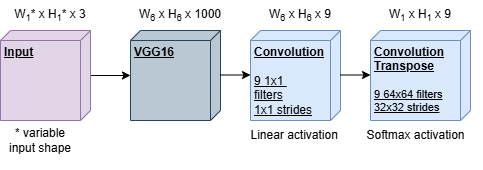

*FCN32*

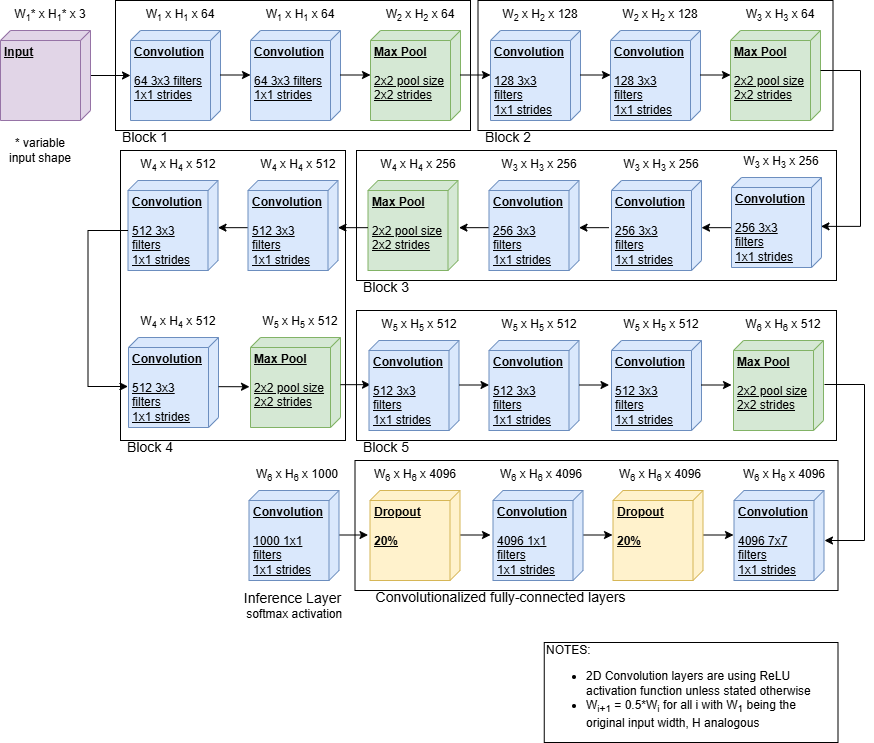

*VGG16*

In [8]:
import  numpy as np
import tensorflow as tf
import tensorflow.keras as keras

#A method to make a VGG-16 FCN model using Keras
def vgg16(l2, dropout):
  #Params: l2 strength and Dropout rate, for regularisations

  input_layer = keras.Input(shape=(None, None, 3), name='input')

  #Preprocessing
  x = keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name='preprocessing')(input_layer)

  #Convolution Block 1: Filter size: 64, Kernel Size: 3x3, Stride = 1
  x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block1_conv1')(x)
  x = keras.layers.Conv2D(filters=64, kernel_size=3,  strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block1_conv2')(x)
  x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block1_pool')(x)

  #Convolution Block 2: Filter size: 128, Kernel Size: 3x3, Stride = 1
  x = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block2_conv1')(x)
  x = keras.layers.Conv2D(filters=128, kernel_size=3,  strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block2_conv2')(x)
  x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block2_pool')(x)

  #Convolution Block 3: Filter size: 256, Kernel Size: 3x3, Stride = 1
  x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block3_conv1')(x)
  x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block3_conv2')(x)
  x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block3_conv3')(x)
  x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block3_pool')(x)

  #Convolution Block 4: Filter size: 512, Kernel Size: 3x3, Stride = 1
  x = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block4_conv1')(x)
  x = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block4_conv2')(x)
  x = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block4_conv3')(x)
  x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block4_pool')(x)

  #Convolution Block 4: Filter size: 512, Kernel Size: 3x3, Stride = 1
  x = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block5_conv1')(x)
  x = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block5_conv2')(x)
  x = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='block5_conv3')(x)
  x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block5_pool')(x)

  #Convolutionized fully-connected layers

  #Layer 6: Filter size: 4096, Kernel size = 7x7, Stride = 1
  x = keras.layers.Conv2D(filters=4096, kernel_size=(7,7), strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.L2(l2=l2), name='conv6')(x)
  x = keras.layers.Dropout(rate=dropout, name='drop6')(x)

  #Layer 7: Filter size: 4096, Kernel size = 1x1, Stride = 1
  x = keras.layers.Conv2D(filters=4096, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.L2(l2=l2), name='conv7')(x)
  x = keras.layers.Dropout(rate=dropout, name='drop7')(x)

  #Inference layer (1000 filters, 1x1 Kernel, Stride of 1)
  x = keras.layers.Conv2D(filters=1000, kernel_size=(1,1), strides=(1,1), padding='same', activation='softmax', name='pred')(x)
  return keras.Model(input_layer, x)

#Now that we have our VGG model, we can add extra layers to build up to the FCN-8
def fcn32(vgg16, l2=0):
    '''32x upsampled FCN.

    Args:
      vgg16 (keras Model): VGG16 model to build upon
      l2 (float): L2 regularization strength

    Returns:
      (keras Model)
    '''

    #Making new layers and adding them onto our VGG-16
    x = keras.layers.Conv2D(filters=21, kernel_size=(1,1), strides=(1,1), padding='same', activation='linear', kernel_regularizer=keras.regularizers.L2(l2=l2),
                            name='score7')(vgg16.get_layer('drop7').output)
    x = keras.layers.Conv2DTranspose(filters=21, kernel_size=(64,64), strides=(32,32),
                                     padding='same', use_bias=False, activation='softmax',
                                     kernel_initializer=BilinearInitializer(),
                                     kernel_regularizer=keras.regularizers.L2(l2=l2),
                                     name='fcn32')(x)
    return keras.Model(vgg16.input, x)

def fcn16(vgg16, fcn32, l2=0):
    '''16x upsampled FCN.

    Args:
      vgg16 (keras Model): VGG16 model to build upon
      fcn32 (keras Model): FCN32 model to build upon
      l2 (float): L2 regularization strength

    Returns:
      (keras Model)
    '''
    x = keras.layers.Conv2DTranspose(filters=21, kernel_size=(4,4), strides=(2,2),
                                     padding='same', use_bias=False, activation='linear',
                                     kernel_initializer=BilinearInitializer(),
                                     kernel_regularizer=keras.regularizers.L2(l2=l2),
                                     name='score7_upsample')(fcn32.get_layer('score7').output)
    y = keras.layers.Conv2D(filters=21, kernel_size=(1,1), strides=(1,1), padding='same', activation='linear',
                            kernel_initializer=keras.initializers.Zeros(),
                            kernel_regularizer=keras.regularizers.L2(l2=l2),
                            name='score4')(vgg16.get_layer('block4_pool').output)
    x = keras.layers.Add(name='skip4')([x, y])
    x = keras.layers.Conv2DTranspose(filters=21, kernel_size=(32,32), strides=(16, 16),
                                     padding='same', use_bias=False, activation='softmax',
                                     kernel_initializer=BilinearInitializer(),
                                     kernel_regularizer=keras.regularizers.L2(l2=l2),
                                     name='fcn16')(x)
    return keras.Model(fcn32.input, x)


def fcn8(vgg16, fcn16, l2=0):
    '''8x upsampled FCN.

    Args:
      vgg16 (keras Model): VGG16 model to build upon
      fcn16 (keras Model): FCN16 model to build upon
      l2 (float): L2 regularization strength

    Returns:
      (keras Model)
    '''
    x = keras.layers.Conv2DTranspose(filters=21, kernel_size=(4,4), strides=(2,2),
                                     padding='same', use_bias=False, activation='linear',
                                     kernel_initializer=BilinearInitializer(),
                                     kernel_regularizer=keras.regularizers.L2(l2=l2),
                                     name='skip4_upsample')(fcn16.get_layer('skip4').output)
    y = keras.layers.Conv2D(filters=21, kernel_size=(1,1), strides=(1,1), padding='same', activation='linear',
                            kernel_initializer=keras.initializers.Zeros(),
                            kernel_regularizer=keras.regularizers.L2(l2=l2),
                            name='score3')(vgg16.get_layer('block3_pool').output)
    x = keras.layers.Add(name='skip3')([x, y])
    x = keras.layers.Conv2DTranspose(filters=21, kernel_size=(16,16), strides=(8,8),
                                     padding='same', use_bias=False, activation='softmax',
                                     kernel_initializer=BilinearInitializer(),
                                     kernel_regularizer=keras.regularizers.L2(l2=l2),
                                     name='fcn8')(x)
    return keras.Model(fcn16.input, x)


## ================
## Misc functions for training
## ================

class BilinearInitializer(keras.initializers.Initializer):
    '''Initializer for Conv2DTranspose to perform bilinear interpolation on each channel.'''
    def __call__(self, shape, dtype=None, **kwargs):
        kernel_size, _, filters, _ = shape
        arr = np.zeros((kernel_size, kernel_size, filters, filters))
        ## make filter that performs bilinear interpolation through Conv2DTranspose
        upscale_factor = (kernel_size+1)//2
        if kernel_size % 2 == 1:
            center = upscale_factor - 1
        else:
            center = upscale_factor - 0.5
        og = np.ogrid[:kernel_size, :kernel_size]
        kernel = (1-np.abs(og[0]-center)/upscale_factor) * \
                 (1-np.abs(og[1]-center)/upscale_factor) # kernel shape is (kernel_size, kernel_size)
        for i in range(filters):
            arr[..., i, i] = kernel
        return tf.convert_to_tensor(arr, dtype=dtype)



def crossentropy(y_true, y_pred_onehot):
    '''Custom cross-entropy to handle borders (class = -1).'''
    n_valid = tf.math.reduce_sum(tf.cast(y_true != 255, tf.float32))
    y_true_onehot = tf.cast(np.arange(21) == y_true, tf.float32)
    return tf.reduce_sum(-y_true_onehot * tf.math.log(y_pred_onehot + 1e-7)) / n_valid

def pixelacc(y_true, y_pred_onehot):
    '''Custom pixel accuracy to handle borders (class = -1).'''
    n_valid = tf.math.reduce_sum(tf.cast(y_true != 255, tf.float32))
    y_true = tf.cast(y_true, tf.int32)[..., 0]
    y_pred = tf.argmax(y_pred_onehot, axis=-1, output_type=tf.int32)
    return tf.reduce_sum(tf.cast(y_true == y_pred, tf.float32)) / n_valid



class MyMeanIoU(keras.metrics.MeanIoU):
    '''Custom meanIoU to handle borders (class = -1).'''
    def update_state(self, y_true, y_pred_onehot, sample_weight=None):
        y_pred = tf.argmax(y_pred_onehot, axis=-1)
        ## add 1 so boundary class=0
        y_true = tf.cast(y_true+1, self._dtype)
        y_pred = tf.cast(y_pred+1, self._dtype)
        ## Flatten the input if its rank > 1.
        if y_pred.shape.ndims > 1:
            y_pred = tf.reshape(y_pred, [-1])
        if y_true.shape.ndims > 1:
            y_true = tf.reshape(y_true, [-1])
        ## calculate confusion matrix with one extra class
        current_cm = tf.math.confusion_matrix(
            y_true,
            y_pred,
            self.num_classes+1,
            weights=sample_weight,
            dtype=self._dtype)
        return self.total_cm.assign_add(current_cm[1:, 1:]) # remove boundary

In [ ]:
#This code block sets up a drive to store models in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/FCN')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FCN'

In [12]:
#Make a VGG model
base_model = vgg16(l2=1e-6, dropout=0.2)

In [13]:
#Load VGG-16 Image weights
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet')
weight_list = vgg16.get_weights()
weight_list[26] = weight_list[26].reshape(7, 7, 512, 4096)
weight_list[28] = weight_list[28].reshape(1, 1, 4096, 4096)
weight_list[30] = weight_list[30].reshape(1, 1, 4096, 1000)
base_model.set_weights(weight_list)
del weight_list

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
#Training the model
from class_names.imagenet import class_names

img = utils.get_image('assets/laska.png') #Replace with image data
plt.figure()
plt.imshow(img)
plt.show()

print('Top three guesses with probabilities:')
probs = base_model.predict(img[None])[0, 3, 3] # pick the central prediction from 7 x 7 square
pred = np.argsort(probs)[::-1]
for i in range(3):
    c = pred[i]
    print("{0:s} (p={1:.3f})".format(class_names[c], probs[c]))

In [14]:
#Freezable layers for experimentation!
fcn32 = fcn32(base_model, l2=1e-6)
# fcn32.get_layer('block1_conv1').trainable=False
# fcn32.get_layer('block1_conv2').trainable=False
# fcn32.get_layer('block2_conv1').trainable=False
# fcn32.get_layer('block2_conv2').trainable=False
# fcn32.get_layer('block3_conv1').trainable=False
# fcn32.get_layer('block3_conv2').trainable=False
# fcn32.get_layer('block3_conv3').trainable=False
# fcn32.get_layer('block4_conv1').trainable=False
# fcn32.get_layer('block4_conv2').trainable=False
# fcn32.get_layer('block4_conv3').trainable=False
# freeze upsample layer
fcn32.get_layer('fcn32').trainable=False

In [19]:
#Load the weights for the FCN32!
fcn32.load_weights('weights/fcn32_25.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'weights/fcn32_25.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:
#Bring in the FCN-16, with custom-freezable layers
fcn16 = fcn16(base_model, fcn32, l2=1e-6)

# fcn16.get_layer('block4_conv1').trainable=True
# fcn16.get_layer('block4_conv2').trainable=True
# fcn16.get_layer('block4_conv3').trainable=True
# freeze upsample layer
fcn16.get_layer('score7_upsample').trainable=False
fcn16.get_layer('fcn16').trainable=False

In [ ]:
#Load our weights for the FCN16!
fcn16.load_weights('weights/fcn16_25.h5')

In [16]:
#Build up an FCN8 over our FCN16
fcn8 = fcn8(base_model, fcn16, l2=1e-6)
#Custom-freezable layers

# fcn8.get_layer('block1_conv1').trainable=True
# fcn8.get_layer('block1_conv2').trainable=True
# fcn8.get_layer('block2_conv1').trainable=True
# fcn8.get_layer('block2_conv2').trainable=True
# fcn8.get_layer('block3_conv1').trainable=True
# fcn8.get_layer('block3_conv2').trainable=True
# fcn8.get_layer('block3_conv3').trainable=True
# freeze upsample layer
fcn8.get_layer('skip4_upsample').trainable=False
fcn8.get_layer('fcn8').trainable=False

In [ ]:
#Load FCN8 weights
fcn8.load_weights('weights/fcn8_25.h5')

Training Blocks

In [17]:
## Load model
model = fcn32
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preprocessing (Lambda)               │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv6 (Conv2D)                       │ (None, None, None, 4096)    │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 136,152,917 (519.38 MB)

 Trainable params: 134,346,581 (512.49 MB)

 Non-trainable params: 1,806,336 (6.89 MB)

In [28]:
#Compile our model
#opt = keras.optimizers.Adam(learning_rate=1e-4)
opt = keras.optimizers.Lamb(learning_rate=1e-4) #The original optimiser funtion here was Adam, but we opted to use Lamb, which is geared towards larger datasets
loss = crossentropy
metrics = [loss,
           pixelacc,
           MyMeanIoU(num_classes=21, name='meanIoU')]
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [38]:
import numpy as np
import tensorflow as tf

#Image resizer for preprocessing

#def resize_with_pad(image, label, size=512):
def resize_with_pad(image, size=512):
    '''Resize a square while keeping the original aspect ratio, padding with black for the image and boundary
    for the label.

    Args:
      image (array<np.uint8>): RGB values for each pixel. Shape=(height, width, 3)
      label (array<np.uint8>): Class labels for each pixel. Shape=(height, width, 1)
      size (int): length of square

    Returns:
      (array<np.uint8>): Resized image. Shape=(size, size, 3)
      (array<np.uint8>): Resized label. Shape=(size, size, 1)
    '''
    image = tf.image.resize_with_pad(image, size, size, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    ## since `resize_with_pad` pads with zeros, use fact that boundary class is -1 to pad with -1 instead.
    #label = tf.image.resize_with_pad(label+1, size, size, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)-1
    #return image, label
    return image

In [48]:
#Split data into training and testing!

print(train.batch(16)[0].shape)

train = train_ds.shuffle(1000).batch(16)
test = test_ds.shuffle(1000).batch(16)

In [49]:
#Test our model!
for X, y in train.shuffle(100).batch(1).take(1):
    plt.figure()
    plt.imshow(X[0])
    plt.show()

    plt.figure()
    plt.imshow(utils.label_to_image(y[0]))
    plt.show()

    plt.figure()
    plt.imshow(utils.label_to_image(utils.onehot_to_label(model(X)[0])))
    plt.show()

    model.evaluate(X, y)

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [128,224,224,3] and element 6 had shape [16,224,224,3]. [Op:IteratorGetNext] name: 

In [18]:
## check running GPU
tf.test.gpu_device_name()

''

In [ ]:
history = model.fit(train, epochs=5, validation_data=val)

In [ ]:
## Save weights and metrics

save_weights('weights/fcn32_5.h5')

with open('logs/fcn32_5', 'wb') as f:
    pickle.dump(history.history, f)

Evaluation Blocks

In [11]:
from PIL import Image
import pickle

In [ ]:
raw_X = get_image('assets/rider.jpg')
raw_y_true = get_label_mat('assets/rider_label.mat')

In [ ]:
X, y_true = resize_with_pad(raw_X, raw_y_true)
y_pred = model(X[None])[0]
_ = evaluate(X[None], y_true[None])

In [ ]:
raw_y_pred = tf.image.resize_with_crop_or_pad(y_pred, raw_y_true.shape[0], raw_y_true.shape[1])
raw_y_pred = utils.onehot_to_label(raw_y_pred)

In [ ]:
plt.figure()
plt.imshow(utils.label_to_image(raw_y_true))
plt.show()

plt.figure()
plt.imshow(utils.label_to_image(raw_y_pred))
plt.show()

In [ ]:
## save pred label
im = Image.fromarray(utils.label_to_image(raw_y_pred))
im.save('assets/fcn32.png')

In [ ]:
## save true label
im = Image.fromarray(utils.label_to_image(raw_y_true))
im.save('assets/rider_label.png')

In [ ]:
## aggregate data if needed
with open('logs/fcn32_5', 'rb') as f:
    h1 = pickle.load(f)
with open('logs/fcn32_10', 'rb') as f:
    h2 = pickle.load(f)
with open('logs/fcn32_15', 'rb') as f:
    h3 = pickle.load(f)
with open('logs/fcn32_20', 'rb') as f:
    h4 = pickle.load(f)
with open('logs/fcn32_25', 'rb') as f:
    h5 = pickle.load(f)

for key in h1:
    h1[key] += h2[key]
    h1[key] += h3[key]
    h1[key] += h4[key]
    h1[key] += h5[key]

with open('logs/fcn32_25x', 'wb') as f:
    pickle.dump(h1, f)

In [ ]:
with open('logs/fcn32_25', 'rb') as f:
    h1 = pickle.load(f)
with open('logs/fcn16_25', 'rb') as f:
    h2 = pickle.load(f)
with open('logs/fcn8_25', 'rb') as f:
    h3 = pickle.load(f)

In [ ]:
plt.plot(range(1,26), h1['val_loss'], '-', color='blue', label='FCN32 validation loss')
plt.plot(range(1,26), h1['loss'], '--', color='blue', label='FCN32 training loss')
plt.plot(range(1,26), h2['val_loss'], '-', color='red', label='FCN16 validation loss')
plt.plot(range(1,26), h2['loss'], '--', color='red', label='FCN16 training loss')
plt.plot(range(1,26), h3['val_loss'], '-', color='green', label='FCN8 validation loss')
plt.plot(range(1,26), h3['loss'], '--', color='green', label='FCN8 training loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(1,26), h1['val_meanIoU'], '-', color='blue', label='FCN32 validation meanIoU')
plt.plot(range(1,26), h1['meanIoU'], '--', color='blue', label='FCN32 training meanIoU')
plt.plot(range(1,26), h2['val_meanIoU'], '-', color='red', label='FCN16 validation meanIoU')
plt.plot(range(1,26), h2['meanIoU'], '--', color='red', label='FCN16 training meanIoU')
plt.plot(range(1,26), h3['val_meanIoU'], '-', color='green', label='FCN8 validation meanIoU')
plt.plot(range(1,26), h3['meanIoU'], '--', color='green', label='FCN8 training meanIoU')
plt.legend()
plt.show()

In [ ]:
print('fcn32 pixel acc: {0:.3f}'.format(h1['val_pixelacc'][-1]))
print('fcn16 pixel acc: {0:.3f}'.format(h2['val_pixelacc'][-1]))
print('fcn8 pixel acc: {0:.3f}'.format(h3['val_pixelacc'][-1]))
print()
print('fcn32 val meanIoU: {0:.3f}'.format(h1['val_meanIoU'][-1]))
print('fcn16 val meanIoU: {0:.3f}'.format(h2['val_meanIoU'][-1]))
print('fcn8 val meanIoU: {0:.3f}'.format(h3['val_meanIoU'][-1]))

In [10]:
#Utility block!

"""
This file contains useful methods for handling image files.
"""

import numpy as np
import tensorflow as tf
import scipy.io # to read .mat files
from PIL import Image # to read image files

PALETTE = np.reshape([
    0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128,
    128, 128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0,
    128, 192, 0, 128, 64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0,
    192, 0, 128, 192, 0, 0, 64, 128, 128, 64, 128, 0, 192, 128, 128, 192, 128,
    64, 64, 0, 192, 64, 0, 64, 192, 0, 192, 192, 0, 64, 64, 128, 192, 64, 128,
    64, 192, 128, 192, 192, 128, 0, 0, 64, 128, 0, 64, 0, 128, 64, 128, 128,
    64, 0, 0, 192, 128, 0, 192, 0, 128, 192, 128, 128, 192, 64, 0, 64, 192, 0,
    64, 64, 128, 64, 192, 128, 64, 64, 0, 192, 192, 0, 192, 64, 128, 192, 192,
    128, 192, 0, 64, 64, 128, 64, 64, 0, 192, 64, 128, 192, 64, 0, 64, 192,
    128, 64, 192, 0, 192, 192, 128, 192, 192, 64, 64, 64, 192, 64, 64, 64, 192,
    64, 192, 192, 64, 64, 64, 192, 192, 64, 192, 64, 192, 192, 192, 192, 192,
    32, 0, 0, 160, 0, 0, 32, 128, 0, 160, 128, 0, 32, 0, 128, 160, 0, 128, 32,
    128, 128, 160, 128, 128, 96, 0, 0, 224, 0, 0, 96, 128, 0, 224, 128, 0, 96,
    0, 128, 224, 0, 128, 96, 128, 128, 224, 128, 128, 32, 64, 0, 160, 64, 0,
    32, 192, 0, 160, 192, 0, 32, 64, 128, 160, 64, 128, 32, 192, 128, 160, 192,
    128, 96, 64, 0, 224, 64, 0, 96, 192, 0, 224, 192, 0, 96, 64, 128, 224, 64,
    128, 96, 192, 128, 224, 192, 128, 32, 0, 64, 160, 0, 64, 32, 128, 64, 160,
    128, 64, 32, 0, 192, 160, 0, 192, 32, 128, 192, 160, 128, 192, 96, 0, 64,
    224, 0, 64, 96, 128, 64, 224, 128, 64, 96, 0, 192, 224, 0, 192, 96, 128,
    192, 224, 128, 192, 32, 64, 64, 160, 64, 64, 32, 192, 64, 160, 192, 64, 32,
    64, 192, 160, 64, 192, 32, 192, 192, 160, 192, 192, 96, 64, 64, 224, 64,
    64, 96, 192, 64, 224, 192, 64, 96, 64, 192, 224, 64, 192, 96, 192, 192,
    224, 192, 192, 0, 32, 0, 128, 32, 0, 0, 160, 0, 128, 160, 0, 0, 32, 128,
    128, 32, 128, 0, 160, 128, 128, 160, 128, 64, 32, 0, 192, 32, 0, 64, 160,
    0, 192, 160, 0, 64, 32, 128, 192, 32, 128, 64, 160, 128, 192, 160, 128, 0,
    96, 0, 128, 96, 0, 0, 224, 0, 128, 224, 0, 0, 96, 128, 128, 96, 128, 0,
    224, 128, 128, 224, 128, 64, 96, 0, 192, 96, 0, 64, 224, 0, 192, 224, 0,
    64, 96, 128, 192, 96, 128, 64, 224, 128, 192, 224, 128, 0, 32, 64, 128, 32,
    64, 0, 160, 64, 128, 160, 64, 0, 32, 192, 128, 32, 192, 0, 160, 192, 128,
    160, 192, 64, 32, 64, 192, 32, 64, 64, 160, 64, 192, 160, 64, 64, 32, 192,
    192, 32, 192, 64, 160, 192, 192, 160, 192, 0, 96, 64, 128, 96, 64, 0, 224,
    64, 128, 224, 64, 0, 96, 192, 128, 96, 192, 0, 224, 192, 128, 224, 192, 64,
    96, 64, 192, 96, 64, 64, 224, 64, 192, 224, 64, 64, 96, 192, 192, 96, 192,
    64, 224, 192, 192, 224, 192, 32, 32, 0, 160, 32, 0, 32, 160, 0, 160, 160,
    0, 32, 32, 128, 160, 32, 128, 32, 160, 128, 160, 160, 128, 96, 32, 0, 224,
    32, 0, 96, 160, 0, 224, 160, 0, 96, 32, 128, 224, 32, 128, 96, 160, 128,
    224, 160, 128, 32, 96, 0, 160, 96, 0, 32, 224, 0, 160, 224, 0, 32, 96, 128,
    160, 96, 128, 32, 224, 128, 160, 224, 128, 96, 96, 0, 224, 96, 0, 96, 224,
    0, 224, 224, 0, 96, 96, 128, 224, 96, 128, 96, 224, 128, 224, 224, 128, 32,
    32, 64, 160, 32, 64, 32, 160, 64, 160, 160, 64, 32, 32, 192, 160, 32, 192,
    32, 160, 192, 160, 160, 192, 96, 32, 64, 224, 32, 64, 96, 160, 64, 224,
    160, 64, 96, 32, 192, 224, 32, 192, 96, 160, 192, 224, 160, 192, 32, 96,
    64, 160, 96, 64, 32, 224, 64, 160, 224, 64, 32, 96, 192, 160, 96, 192, 32,
    224, 192, 160, 224, 192, 96, 96, 64, 224, 96, 64, 96, 224, 64, 224, 224,
    64, 96, 96, 192, 224, 96, 192, 96, 224, 192, 224, 224, 192], (-1, 3))



def get_image(path):
    '''Retrieve image as array of RGB values from .jpg file.

    Args:
      path (string): Path to .jpg file

    Returns:
      (array<np.uint8>): RGB values for each pixel. Shape=(height, width, 3)
    '''
    jpg = Image.open(path).convert('RGB')
    return np.array(jpg)



def get_label_mat(path):
    '''Retrieve class labels for each pixel from Berkeley SBD .mat file.

    Args:
      path (string): Path to .mat file

    Returns:
      (array<np.uint8>): Class as an integer in [0, 20] for each pixel. Shape=(height, width, 1)
    '''
    mat = scipy.io.loadmat(path)
    arr = mat['GTcls']['Segmentation'].item(0,0) # this is how segmentation is stored
    return arr[..., None]



def get_label_png(path):
    '''Retrieve class labels for each pixel from Pascal VOC .png file.

    Args:
      path (string): Path to .png file

    Returns:
      (array<np.uint8>): Class as an integer in [-1, 20], where -1 is boundary, for each pixel. Shape=(height, width, 1)
    '''
    png = Image.open(path) # image is saved as palettised png. OpenCV cannot load without converting.
    arr = np.array(png)
    return arr[..., None]



def label_to_image(label, palette=PALETTE):
    '''Converts class labels to color image using a palette.

    Args:
      label (array<np.uint8>): Class labels for each pixel. Shape=(height, width, 1)
      palette (array<np.uint8>): RGB values for each class. Shape=(255, 3)

    Returns:
      (array<np.uint8>): RGB values for each pixel. Shape=(height, width, 3)
    '''
    return palette[label[..., 0]].astype(np.uint8)



def label_to_onehot(label, num_classes=21):
    '''Converts class labels to its one-hot encoding.

    Args:
      label (array<np.uint8>): Class labels for each pixel. Shape=(height, width, 1)

    Returns:
      (array<np.uint8>): One-hot encoding of class labels for each pixel. Boundary is ignored.
        Shape=(height, width, num_classes)
    '''
    return (np.arange(21) == label).astype(np.uint8)



def onehot_to_label(arr):
    '''Opposite of label_to_onehot().'''
    arr = np.argmax(arr, axis=-1).astype(np.uint8)
    return arr[..., None]

def get_example(image, label):
    '''Given image and label, produce a tf Example that can be written to a .tfrecords file.

    Args:
      image (array<np.uint8>): Shape=(height, width, 3)
      label (array<np.uint8>): Shape=(height, width, 1)

    Returns:
      (tf Example)
    '''
    ## Usage:
    #with tf.io.TFRecordWriter(PATH_TO_TFRECORDS) as writer:
    #    writer.write(get_example(image, label).SerializeToString())
    feature = {
        'height': tf.train.Feature(int64_list=tf.train.Int64List(value=[image.shape[0]])),
        'width': tf.train.Feature(int64_list=tf.train.Int64List(value=[image.shape[1]])),
        'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image.tobytes()])),
        'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label.tobytes()]))
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))



def parse_example(example):
    '''Parse tf Example to obtain image and label.

    Args:
      example (tf Example)

    Returns:
      image (array<np.uint8>): Shape=(height, width, 3)
      label (array<np.uint8>): Shape=(height, width, 1)
    '''
    ## Usage:
    #dataset = tf.data.TFRecordDataset(PATH_TO_TFRECORDS).map(parse_example)
    feature_description = {
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.string),
    }
    dct = tf.io.parse_single_example(example, feature_description)
    height = dct['height']
    width = dct['width']
    image = tf.reshape(tf.io.decode_raw(dct['image'], out_type=tf.uint8), (height, width, 3))
    label = tf.reshape(tf.io.decode_raw(dct['label'], out_type=tf.uint8), (height, width, 1))
    return image, label

### Description Tasks

#### Weight Initialization
The FCN32 makes use of a pretrained VGG16 model, thus weights are set based on prior training of the model with a different dataset. The last layer of the FCN32, the Convolution Transpose layer, makes use of a custom initializer, the Bilinear Initializer. The Convolution Transpose layer is used for upsampling the output of the previous layer to the original image size to get labels for each pixel. The Bilinear Initializer prepares learning this task by creating an initial kernel with weights that get interpolated in such a way that the weight is largest in the center of the Kernel and reduces its height towards the edges. All other kernel weights in the FCN32 model as well as in the GoogleLeNet model are initialized with the Glorot uniform initializer, whereas biases are initialized with the Zeros initializer. Both are the default initilalizer Keras offers for layers in their model. 

##### The Glorot uniform initializer
Weights are sampled from a uniform distribution (specific form of probability distribution) with bounds that depends on the input and output of the corresponding layer. It controls the variance and thus helps prevent issues like vanishing or exploding gradients during training.

##### The Zeros initializer
Weights are initially all set to 0.

#### Activation Functions
FCN32 and GoogleLeNet both mainly use ReLU as an activation function, Softmax for the final output and a linear activation function for the layer before the last one. Additionally, GoogleLeNet uses the Softmax in the last layer of its auxillary classifier.

##### ReLU (Rectified Linear Unit)
The ReLU returns its input, if it's non-negative. As most of the activation functions, it introduces non-linearity that ensures that the model can deal with complex data. Compared to other activation functions that are used in hidden layers, it prevents the problem of vanishing gradients.
* Formula: f(x) = max(0, x)

##### Linear
Returns its input; This is only used in one layer of both models, where we do not need to introduce more complexity or non-linearity to the model, but need to produce our final classification (either with a fully connected layer as in GoogleLeNet or a Convolutional Layer with Kernel size 1 in the FCN32).
* Formula: f(x) = x

##### Softmax:
In the last layer, by using the softmax activation function both architectures ensure that the output can be interpreted as probabilities for the different classification classes. It ensures values between 0 and 1 for each output, that in sum add up to 1.
* Formula: p(i) = exp(x(i)) / (exp(x(1)) + exp(x(2)) + … + exp(x(n)))
    * Where p(i) is the probability of the ith class, x(i) is the ith input into the activation function and n is the number of inputs into the activation function
    * exp means the exponential function 